In [2]:
!pip install imbalanced-learn
!pip install xgboost
!pip install graphviz

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("C:/Users/poula/Downloads/rawdata.csv")
print (df.head(6))

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  for

In [5]:
#checking for missing values
print (df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
#select all columns except the first since the id variable is irrelevant for meaningful predictions of any appropriate outcome variable in this dataset

df = df.iloc[:, 1:] 
print (df.head(6))

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21   NaN     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly s

In [7]:
print (df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [8]:
# Convert multiple object columns to category
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].astype('category')

# Check the data types
print(df.dtypes)

gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


In [9]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2994
Male: 2115
Other: 1

Count of each level in 'ever_married':
Yes: 3353
No: 1757

Count of each level in 'work_type':
Private: 2925
Self-employed: 819
children: 687
Govt_job: 657
Never_worked: 22

Count of each level in 'Residence_type':
Urban: 2596
Rural: 2514

Count of each level in 'smoking_status':
never smoked: 1892
Unknown: 1544
formerly smoked: 885
smokes: 789


In [10]:
#select all numerical variables in this dataset and obtain their summary statistics

numeric_columns = df.select_dtypes(include=['float64']).columns
print(df[numeric_columns].describe())

               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


In [11]:
#Obtain the count information for the values in the stroke, hypertension, and  heart_disease variables

def get_counts(df, column_name):
    # Convert the column_name type to int64, handling potential errors
    df[column_name] = pd.to_numeric(df[column_name], errors='raise').astype('int64')
    
    #calculate the value counts and sort by index which will be the column_name values.
    value_counts = df[column_name].value_counts().sort_index()
    print(f"Frequency counts for '{column_name}':\n{value_counts}\n")

get_counts(df,'stroke')
get_counts(df, 'hypertension')
get_counts(df, 'heart_disease')

Frequency counts for 'stroke':
stroke
0    4861
1     249
Name: count, dtype: int64

Frequency counts for 'hypertension':
hypertension
0    4612
1     498
Name: count, dtype: int64

Frequency counts for 'heart_disease':
heart_disease
0    4834
1     276
Name: count, dtype: int64



In [12]:
#avg_glucose_level

# Define the bins and labels
#bins = [50, 120, 190, float('inf')]
#labels = [1, 2, 3]

# Create the 'avg_glucose_level_temp' column using pd.cut
#df['avg_glucose_level_temp_cat'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Fit and transform the categorical column
#df['avg_glucose_level_temp'] = label_encoder.fit_transform(df['avg_glucose_level_temp_cat']) + 1 # +1 to match the original labels

#df.drop('avg_glucose_level_temp_cat', axis=1, inplace=True)
# Print the DataFrame with the new categorical column
#print(df.head(3))'

In [13]:
#Obtain the frequency counts of the newly created variables Age_temp and avg_glucose_level_temp
#get_counts(df,'Age_temp')
#get_counts(df, 'avg_glucose_level_temp')'


In [14]:
#Gender variable
#Transform the Gender variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'gender' column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
get_counts(df,'gender_encoded')

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Gender Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
2       1
Name: count, dtype: int64

Gender Mapping:
Female: 0
Male: 1
Other: 2


In [15]:
#Filtering
# Filter rows where Gender is 'Other'
other_gender_rows = df[df['gender'] == 'Other']
print (other_gender_rows)

     gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
3116          Rural             143.33  22.4  formerly smoked       0   

      gender_encoded  
3116               2  


In [16]:
df = df.drop(df[df['gender'] == 'Other'].index) #Drop rows where Gender is 'Other'
get_counts(df,'gender_encoded')

Frequency counts for 'gender_encoded':
gender_encoded
0    2994
1    2115
Name: count, dtype: int64



In [17]:
#print (df['gender'].cat.categories)
#drop the Gender = Other category from the gender variable
df['gender'] = df['gender'].cat.remove_categories('Other')
print (df['gender'].cat.categories)

Index(['Female', 'Male'], dtype='object')


In [18]:
#ever_married
#Transform the ever_married variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'ever_married' column
df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("ever_married Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  
0               1                     1  
1               0                     1  
2               1                     1  
ever_married Mapping:
No: 0
Yes: 1


In [19]:
#Worktype
print (df['work_type'].cat.categories)
df_children = df[ (df['work_type'] == 'children')] 
df_children.to_csv('stroke_data_children.csv', index = False)

#show all observations when work_type is children and any of hypertension, heart_disease, and 'stroke' is 1
filtered_df = df[
    (df['work_type'] == 'children') &
   ( (df['stroke'] == 1) |
    (df['hypertension'] == 1) |
    (df['heart_disease'] == 1)
   )
]

# Print the filtered observations
print(filtered_df)

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'], dtype='object')
      gender    age  hypertension  heart_disease ever_married work_type  \
162   Female   1.32             0              0           No  children   
245   Female  14.00             0              0           No  children   
3031    Male   2.00             0              1           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
162           Urban              70.37   NaN        Unknown       1   
245           Rural              57.93  30.9        Unknown       1   
3031          Urban              62.89  29.4        Unknown       0   

      gender_encoded  ever_married_encoded  
162                0                     0  
245                0                     0  
3031               1                     0  


In [20]:
#Remove the children level from variable work_type
df = df.drop(df[df['work_type'] == 'children'].index)
print (df[df['work_type'] == 'children'])

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke, gender_encoded, ever_married_encoded]
Index: []


In [21]:
# Drop the 'children' level from the 'work_type' category
df['work_type'] = df['work_type'].cat.remove_categories('children')
print (df['work_type'].cat.categories)

Index(['Govt_job', 'Never_worked', 'Private', 'Self-employed'], dtype='object')


In [22]:
print (df.shape) #4,422 observations at this time in df dataframe

(4422, 13)


In [23]:
#Work type encoding

#Transform the Work type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'work_type' column
df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))



# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("work_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  
0               1                     1                  2  
1               0                     1                  3  
2               1                     1                  2  
work_type Mapping:
Govt_job: 0
Never_worked: 1
Private: 2
Self-employed: 3


In [24]:
#Residence type

#Transform the Residence type variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Residence_type' column
df['Residence_type_encoded'] = label_encoder.fit_transform(df['Residence_type'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  
0                       1  
1                       0  
2                       0  
Residence_type Mapping:
Rural: 0
Urban: 1


In [25]:
#smoking status
#Transform the smoking status variable into a numerical variable using the label encoder method

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_status' column
df['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])

# Print the DataFrame with the new encoded column
print(df.head(3))

# Get the unique classes and their corresponding labels
class_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Residence_type Mapping:")
for key, value in class_labels.items():
    print(f"{key}: {value}")

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  smoking_status_encoded  
0                       1                       1  
1                       0                       2  
2        

In [26]:
print (df.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
dtype: object


In [27]:
#Age
#Give summary statistics for ALL people in this dataset
print(df['age'].describe())
print()

count    4422.000000
mean       48.883311
std        18.706121
min         7.000000
25%        34.000000
50%        49.000000
75%        63.000000
max        82.000000
Name: age, dtype: float64



In [28]:
#obtain and print the 10 youngest people in this dataset with EITHER hypertension, heart disease OR stroke
df_disease = df[ ((df['stroke'] == 1) | (df['heart_disease'] == 1) | (df['hypertension'] == 1))]
age_disease_youngest_10 = df_disease.nsmallest(10, 'age')
#print observations for youngest 10 with any of the three diseases
print ( df_disease.sort_values(by='age').head(10))

      gender   age  hypertension  heart_disease ever_married work_type  \
2128    Male  17.0             1              0           No   Private   
2387  Female  19.0             1              0           No   Private   
1554  Female  22.0             1              0           No   Private   
928   Female  23.0             1              0           No   Private   
2083  Female  24.0             1              0           No   Private   
1746    Male  24.0             1              0          Yes   Private   
2949  Female  26.0             1              0          Yes   Private   
3667  Female  28.0             1              0          Yes  Govt_job   
3885  Female  28.0             0              1          Yes   Private   
715   Female  28.0             1              0           No   Private   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
2128          Rural              61.67  97.6        Unknown       0   
2387          Rural              65.96  29.

In [29]:
#Hypertension
#df_hypertension_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that hypertension = 1 (present)
df_hypertension_only = df_disease[df_disease['hypertension'] == 1]
print (df_hypertension_only.shape)

(498, 16)


In [30]:
hypertension_min_age = df_hypertension_only['age'].min()
print (hypertension_min_age)
#print (df_hypertension_only.head(3))

17.0


In [31]:
#df_hypertension_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with hypertension.
df_hypertension_full = df[df['age'] >= hypertension_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_hypertension_full.shape) 

(4313, 16)


In [32]:
#Heart disease
#df_heart_disease_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that heart_disease = 1 (present)
df_heart_disease_only = df_disease[df_disease['heart_disease'] == 1]
print (df_heart_disease_only.shape)

(275, 16)


In [33]:
heart_disease_min_age = df_heart_disease_only['age'].min()
print (heart_disease_min_age)

28.0


In [34]:
#df_heart_disease_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with heart disease.
df_heart_disease_full = df[df['age'] >= heart_disease_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_heart_disease_full.shape) 

(3700, 16)


In [35]:
#Stroke
#df_stroke_only contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that stroke = 1 (present)
df_stroke_only = df_disease[df_disease['stroke'] == 1]
print (df_stroke_only.shape)

(247, 16)


In [36]:
stroke_min_age = df_stroke_only['age'].min()
print (stroke_min_age)

32.0


In [37]:
#df_stroke_full contains all the observations in the df dataframe (after the removal of work_type = children) with the condition
#that the age value should be greater or equal to the minimum age of any person in this dataset with stroke.
df_stroke_full = df[df['age'] >= stroke_min_age].copy() #making an explicit copy of the sliced dataframe
print (df_stroke_full.shape) 

(3461, 16)


In [38]:
#This function creates a categorical age variable based on the median age with the dataframe it receives as an argument.
#(One of the variables in the dataframe argument must be age.) It then returns the modified dataframe.
def create_age_category(df, age_column='age', category_name='Age_temp_cat'):
    median_age = round(df[age_column].median())
    print("Median Age:", median_age)

    bins = [0, median_age, df[age_column].max() + 1]
    labels = [0, 1]

    df[category_name] = pd.cut(df[age_column], bins=bins, labels=labels, right=False)
    return df

In [39]:
#This function encodes a categorical age variable in a dataframe using LabelEncoder.
#It then drops the categorical age variable and returns the modified dataframe.
def encode_age_category(df, category_name='Age_temp_cat', encoded_name='Age_temp'):
    encoder = LabelEncoder()
    df[encoded_name] = encoder.fit_transform(df[category_name])
    df.drop(category_name, axis=1, inplace=True)
    return df

In [40]:
#Creates a categorical glucose level column based on the median glucose level and 
#returns the modified dataframe
def create_glucose_category(df, glucose_column='avg_glucose_level', category_name='avg_glucose_level_temp_cat'):
    median_glucose = round(df[glucose_column].median())
    print("Median Avg Glucose Level:", median_glucose)

    bins = [0, median_glucose, df[glucose_column].max() + 1]
    labels = [0, 1]

    df[category_name] = pd.cut(df[glucose_column], bins=bins, labels=labels, right=False)
    return df

In [41]:
# Encodes the categorical glucose level column using LabelEncoder and
# returns the modified dataframe
def encode_glucose_category(df, category_name='avg_glucose_level_temp_cat', encoded_name='avg_glucose_level_temp'):
    label_encoder = LabelEncoder()
    df[encoded_name] = label_encoder.fit_transform(df[category_name]) + 1  # +1 to match the original labels
    df.drop(category_name, axis=1, inplace=True)
    return df

In [42]:
#  Imputes missing BMI values using grouped medians based on other relevant variables in this dataframe. 
def impute_bmi_with_grouped_medians(df):
     # Identify the variables to group by
    grouping_columns = [
                         'gender_encoded',
                         'work_type_encoded',
                        'Residence_type_encoded', 'smoking_status_encoded',
                        'Age_temp' , 'avg_glucose_level_temp'
                        ]
    # Calculate grouped medians
    grouped_medians = df.groupby(grouping_columns)['bmi'].transform('median')

     # Impute missing values
    df['bmi'] = df['bmi'].fillna(grouped_medians)
    return (df)

In [43]:
 #prints observations with missing BMI values in a DataFrame.
def print_missing_bmi_rows(df, bmi_column='bmi'):
    missing_bmi_rows = df[df[bmi_column].isnull()]
    if not missing_bmi_rows.empty:
        print("Rows with missing BMI values:")
        print(missing_bmi_rows)
    else:
        print("No missing BMI values found.")

In [44]:

#computes the minimum and maximum values of a numerical variable in a pandas dataframe and returns them
def get_min_max_values(df, numerical_variable):
    if numerical_variable not in df.columns:
        print(f"Error: Column '{numerical_variable}' not found in the dataframe")
        

    try:
        min_value = df[numerical_variable].min()
        max_value = df[numerical_variable].max()
        return min_value, max_value
    except TypeError:
        print(f"Error: Column '{numerical_variable}' is not numeric.")

In [45]:
# Create the Age_temp_cat column
df_stroke_full = create_age_category(df_stroke_full)

# Encode the Age_temp_cat column
df_stroke_full = encode_age_category(df_stroke_full)

print (df_stroke_full.head(3))

Median Age: 55
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21   NaN     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  smoking_status_encoded  Age_temp  
0                       1                       1         1  
1                       0 

In [46]:

# Create the avg_glucose_level_temp_cat column
df_stroke_full = create_glucose_category(df_stroke_full)

# Encode the avg_glucose_level_temp_cat column
df_stroke_full = encode_glucose_category(df_stroke_full)

Median Avg Glucose Level: 94


In [47]:
# Impute missing BMI values
df_stroke_full = impute_bmi_with_grouped_medians(df_stroke_full)
print (df_stroke_full.head(3))


   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
0          Urban             228.69  36.6  formerly smoked       1   
1          Rural             202.21  28.8     never smoked       1   
2          Rural             105.92  32.5     never smoked       1   

   gender_encoded  ever_married_encoded  work_type_encoded  \
0               1                     1                  2   
1               0                     1                  3   
2               1                     1                  2   

   Residence_type_encoded  smoking_status_encoded  Age_temp  \
0                       1                       1         1   
1                       0              

In [48]:

#checking for presence of missing values
print (df_stroke_full.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
Age_temp                  0
avg_glucose_level_temp    0
dtype: int64


In [49]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_stroke_full)

No missing BMI values found.


In [50]:
print (df_stroke_full.dtypes)

gender                    category
age                        float64
hypertension                 int64
heart_disease                int64
ever_married              category
work_type                 category
Residence_type            category
avg_glucose_level          float64
bmi                        float64
smoking_status            category
stroke                       int64
gender_encoded               int64
ever_married_encoded         int32
work_type_encoded            int32
Residence_type_encoded       int32
smoking_status_encoded       int32
Age_temp                     int64
avg_glucose_level_temp       int64
dtype: object


In [51]:
#Obtain minimum and maximum values of age in df_stroke_full
stroke_all_min_age, stroke_all_max_age = get_min_max_values(df_stroke_full, 'age')
print (stroke_all_min_age, stroke_all_max_age)

32.0 82.0


In [52]:
#checking for minimum age criterion
#stroke_all_min_age = df_stroke_full['age'].min()
#print (stroke_all_min_age)
print()
print()
stroke_yes_min_age = df_stroke_full[df_stroke_full['stroke'] == 1]['age'].min()
print (stroke_yes_min_age)



32.0


In [53]:
#checking for maximum age criterion

#stroke_all_max_age = df_stroke_full['age'].max()
#print (stroke_all_max_age)
print()
print()
stroke_yes_max_age = df_stroke_full[df_stroke_full['stroke'] == 1]['age'].max()
print (stroke_yes_max_age)



82.0


In [54]:
#After checking for the age cut-off
df_stroke_full.shape

(3461, 18)

In [55]:
#Obtain minimum and maximum values of avg_glucose_level in df_stroke_full
stroke_all_min_avg_glucose_level, stroke_all_max_avg_glucose_level = get_min_max_values(df_stroke_full, 'avg_glucose_level')
print (stroke_all_min_avg_glucose_level, stroke_all_max_avg_glucose_level)

55.22 271.74


In [56]:
#checking for minimum avg_glucose_level
#stroke_all_min_avg_glucose_level = df_stroke_full['avg_glucose_level'].min()
#print (stroke_all_min_avg_glucose_level)
print()
print()
stroke_yes_min_avg_glucose_level = df_stroke_full[df_stroke_full['stroke'] == 1]['avg_glucose_level'].min()
print (stroke_yes_min_avg_glucose_level)



56.11


In [57]:
#checking for maximum avg_glucose_level
#stroke_all_max_avg_glucose_level = df_stroke_full['avg_glucose_level'].max()
#print (stroke_all_max_avg_glucose_level)
print()
print()
stroke_yes_max_avg_glucose_level = df_stroke_full[df_stroke_full['stroke'] == 1]['avg_glucose_level'].max()
print (stroke_yes_max_avg_glucose_level)



271.74


In [58]:
#While the maximum avg_glucose_level cut-off is being satisfied, the minimum avg_glucose_level cut-off is not being satisfied. We will have to do filtering to ensure that the minimum age value of any observation in

#the stroke dataframe for avg_glucose_level is 56.11.

#Let us now perform a similar check on the BMI values

stroke_all_min_bmi, stroke_all_max_bmi = get_min_max_values(df_stroke_full, 'bmi')
print (stroke_all_min_bmi, stroke_all_max_bmi)

11.3 92.0


In [59]:
#checking for minimum bmi
#stroke_all_min_bmi = df_stroke_full['bmi'].min()
#print (stroke_all_min_bmi)
print()
print()
stroke_yes_min_bmi = df_stroke_full[df_stroke_full['stroke'] == 1]['bmi'].min()
print (stroke_yes_min_bmi)



16.9


In [60]:
#checking for maximum bmi
#stroke_all_max_bmi = df_stroke_full['bmi'].max()
#print (stroke_all_max_bmi)
print()
print()
stroke_yes_max_bmi = df_stroke_full[df_stroke_full['stroke'] == 1]['bmi'].max()
print (stroke_yes_max_bmi)



56.6


In [61]:
#We note that the lower and upper cut-off values for bmi in the df_stroke_full dataframe for observations with stroke = 1 is 16.9 and 56.6 while the lower and upper cut-off values for all observations in this

#dataframe is 11.3 and 92. We will need to ensure that the stroke dataframe has bmi values between 16.9 and 56.6. Let us filter the df_stroke_full dataframe to improve its quality for the purpose of modelling.

In [62]:
df_stroke_full = df_stroke_full[
    (df_stroke_full['bmi'] >= stroke_yes_min_bmi) & (df_stroke_full['bmi'] <= stroke_yes_max_bmi) & 
    (df_stroke_full['avg_glucose_level'] >= stroke_yes_min_avg_glucose_level) &
    (df_stroke_full['avg_glucose_level'] <= stroke_yes_max_avg_glucose_level)

]
print (df_stroke_full.shape)

(3413, 18)


In [63]:
#print (df_stroke_full.dtypes)

# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_stroke_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_stroke_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2026
Male: 1387

Count of each level in 'ever_married':
Yes: 3051
No: 362

Count of each level in 'work_type':
Private: 2090
Self-employed: 753
Govt_job: 570
Never_worked: 0

Count of each level in 'Residence_type':
Urban: 1729
Rural: 1684

Count of each level in 'smoking_status':
never smoked: 1371
formerly smoked: 773
Unknown: 661
smokes: 608


In [64]:
#Dropping the Never_worked level for the work_type category variable
df_stroke_full['work_type'] = df_stroke_full['work_type'].cat.remove_categories('Never_worked')
print (df_stroke_full['work_type'].cat.categories)

Index(['Govt_job', 'Private', 'Self-employed'], dtype='object')


In [65]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_stroke_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_stroke_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2026
Male: 1387

Count of each level in 'ever_married':
Yes: 3051
No: 362

Count of each level in 'work_type':
Private: 2090
Self-employed: 753
Govt_job: 570

Count of each level in 'Residence_type':
Urban: 1729
Rural: 1684

Count of each level in 'smoking_status':
never smoked: 1371
formerly smoked: 773
Unknown: 661
smokes: 608


In [66]:
#print (df_stroke_full.dtypes)

In [67]:
# Write the cleaned df_stroke_full dataframe to a csv file. 
df_stroke_full.to_csv('stroke_full.csv', index=False)

In [68]:
# Create the Age_temp_cat column
df_heart_disease_full = create_age_category(df_heart_disease_full)

# Encode the Age_temp_cat column
df_heart_disease_full = encode_age_category(df_heart_disease_full)

#print (df_heart_disease_full.head(3))

Median Age: 54


In [69]:
# Create the avg_glucose_level_temp_cat column
df_heart_disease_full = create_glucose_category(df_heart_disease_full)

# Encode the avg_glucose_level_temp_cat column
df_heart_disease_full = encode_glucose_category(df_heart_disease_full)

Median Avg Glucose Level: 93


In [70]:
# Impute missing BMI values
df_heart_disease_full = impute_bmi_with_grouped_medians(df_heart_disease_full)
#print (df_heart_disease_full.head(3))

In [71]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_heart_disease_full)

No missing BMI values found.


In [72]:
#print (df_heart_disease_full.dtypes)

In [73]:
#Obtain minimum and maximum values of age in df_heart_disease_full
heart_disease_all_min_age, heart_disease_all_max_age = get_min_max_values(df_heart_disease_full, 'age')
print (heart_disease_all_min_age, heart_disease_all_max_age)

28.0 82.0


In [74]:
#Identifying minimum age criterion and maximum age criterion in df_heart_disease_full
heart_disease_yes_min_age = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['age'].min()
heart_disease_yes_max_age = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['age'].max()
print (heart_disease_yes_min_age, heart_disease_yes_max_age)

28.0 82.0


In [75]:
#Obtain minimum and maximum values of avg_glucose_level  in df_heart_disease_full
heart_disease_all_min_avg_glucose_level, heart_disease_all_max_avg_glucose_level = get_min_max_values(df_heart_disease_full, 'avg_glucose_level')
print (heart_disease_all_min_avg_glucose_level, heart_disease_all_max_avg_glucose_level)

55.22 271.74


In [76]:
#Identifying minimum avg_glucose_level criterion and maximum avg_glucose_level criterion in df_heart_disease_full
heart_disease_yes_min_avg_glucose_level = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['avg_glucose_level'].min()
heart_disease_yes_max_avg_glucose_level = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['avg_glucose_level'].max()

print (heart_disease_yes_min_avg_glucose_level,heart_disease_yes_max_avg_glucose_level )

56.31 271.74


In [77]:
#The maximum value of avg_glucose_level in df_heart_disease_full is equal to the upper cut-off value. However, the minimum value of avg_glucose_level in df_heart_disease_full is lower than the lower cut-off value.

#Consequently, we will have to filter this dataframe appropriately. We move on to bmi for now.

In [78]:
#Obtain minimum and maximum values of bmi in df_heart_disease_full
heart_disease_all_min_bmi, heart_disease_all_max_bmi = get_min_max_values(df_heart_disease_full, 'bmi')
print (heart_disease_all_min_bmi, heart_disease_all_max_bmi)

11.3 92.0


In [79]:
#Identifying minimum bmi criterion and maximum bmi criterion in df_heart_disease_full
heart_disease_yes_min_bmi = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['bmi'].min()
heart_disease_yes_max_bmi = df_heart_disease_full[df_heart_disease_full['heart_disease'] == 1]['bmi'].max()

print (heart_disease_yes_min_bmi,heart_disease_yes_max_bmi )

19.1 54.7


In [80]:
df_heart_disease_full = df_heart_disease_full[
    (df_heart_disease_full['bmi'] >= heart_disease_yes_min_bmi) & (df_heart_disease_full['bmi'] <= heart_disease_yes_max_bmi) & 
    (df_heart_disease_full['avg_glucose_level'] >= heart_disease_yes_min_avg_glucose_level) &
    (df_heart_disease_full['avg_glucose_level'] <= heart_disease_yes_max_avg_glucose_level)

]
print (df_heart_disease_full.shape)

(3604, 18)


In [81]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_heart_disease_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_heart_disease_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2149
Male: 1455

Count of each level in 'ever_married':
Yes: 3154
No: 450

Count of each level in 'work_type':
Private: 2247
Self-employed: 766
Govt_job: 591
Never_worked: 0

Count of each level in 'Residence_type':
Urban: 1845
Rural: 1759

Count of each level in 'smoking_status':
never smoked: 1450
formerly smoked: 792
Unknown: 700
smokes: 662


In [82]:
#Dropping the Never_worked level for the work_type category variable
df_heart_disease_full['work_type'] = df_heart_disease_full['work_type'].cat.remove_categories('Never_worked')
print (df_heart_disease_full['work_type'].cat.categories)

Index(['Govt_job', 'Private', 'Self-employed'], dtype='object')


In [83]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_heart_disease_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_heart_disease_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2149
Male: 1455

Count of each level in 'ever_married':
Yes: 3154
No: 450

Count of each level in 'work_type':
Private: 2247
Self-employed: 766
Govt_job: 591

Count of each level in 'Residence_type':
Urban: 1845
Rural: 1759

Count of each level in 'smoking_status':
never smoked: 1450
formerly smoked: 792
Unknown: 700
smokes: 662


In [84]:
# Write the cleaned df_heart_disease_full dataframe to a csv file
df_heart_disease_full.to_csv('heart_disease_full.csv', index=False)

In [85]:
# Create the Age_temp_cat column
df_hypertension_full = create_age_category(df_hypertension_full)

# Encode the Age_temp_cat column
df_hypertension_full = encode_age_category(df_hypertension_full)

#print (df_heart_disease_full.head(3))

Median Age: 50


In [86]:
# Create the avg_glucose_level_temp_cat column
df_hypertension_full = create_glucose_category(df_hypertension_full)

# Encode the avg_glucose_level_temp_cat column
df_hypertension_full = encode_glucose_category(df_hypertension_full)

Median Avg Glucose Level: 92


In [87]:
# Impute missing BMI values
df_hypertension_full = impute_bmi_with_grouped_medians(df_hypertension_full)
#print (df_hypertension_full.head(3))

In [88]:
# Print observations with missing BMI values
print_missing_bmi_rows(df_hypertension_full)

No missing BMI values found.


In [89]:
#Obtain minimum and maximum values of age in df_hypertension_full
hypertension_all_min_age, hypertension_all_max_age = get_min_max_values(df_hypertension_full, 'age')
print (hypertension_all_min_age, hypertension_all_max_age)

17.0 82.0


In [90]:
#Identifying minimum age criterion and maximum age criterion in df_heart_disease_full
hypertension_yes_min_age = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['age'].min()
hypertension_yes_max_age = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['age'].max()
print (hypertension_yes_min_age, hypertension_yes_max_age)

17.0 82.0


In [91]:
#Obtain minimum and maximum values of avg_glucose_level  in df_hypertension
hypertension_all_min_avg_glucose_level, hypertension_all_max_avg_glucose_level = get_min_max_values(df_hypertension_full, 'avg_glucose_level')
print (hypertension_all_min_avg_glucose_level, hypertension_all_max_avg_glucose_level)

55.12 271.74


In [92]:
#Identifying minimum avg_glucose_level criterion and maximum avg_glucose_level criterion in df_hypertension_full
hypertension_yes_min_avg_glucose_level = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['avg_glucose_level'].min()
hypertension_yes_max_avg_glucose_level = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['avg_glucose_level'].max()

print (heart_disease_yes_min_avg_glucose_level,heart_disease_yes_max_avg_glucose_level )

56.31 271.74


In [93]:
#Obtain minimum and maximum values of bmi in df_heart_disease_full
hypertension_all_min_bmi, hypertension_all_max_bmi = get_min_max_values(df_hypertension_full, 'bmi')
print (hypertension_all_min_bmi, hypertension_all_max_bmi)

11.3 97.6


In [94]:
#Identifying minimum bmi criterion and maximum bmi criterion in df_heart_disease_full
hypertension_yes_min_bmi = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['bmi'].min()
hypertension_yes_max_bmi = df_hypertension_full[df_hypertension_full['hypertension'] == 1]['bmi'].max()

print (hypertension_yes_min_bmi,hypertension_yes_max_bmi )

15.0 97.6


In [95]:
df_hypertension_full = df_hypertension_full[
    (df_hypertension_full['bmi'] >= heart_disease_yes_min_bmi) & (df_hypertension_full['bmi'] <= hypertension_yes_max_bmi) & 
    (df_hypertension_full['avg_glucose_level'] >= hypertension_yes_min_avg_glucose_level) &
    (df_hypertension_full['avg_glucose_level'] <= hypertension_yes_max_avg_glucose_level)

]
print (df_hypertension_full.shape)

(4242, 18)


In [96]:
# Select all category variables in this dataset and obtain the counts of each levels of those variables.
category_columns = df_hypertension_full.select_dtypes(include='category').columns

for col in category_columns:
    print(f"\nCount of each level in '{col}':")
    counts = df_hypertension_full[col].value_counts()
    for category, count in counts.items():
        print(f"{category}: {count}")


Count of each level in 'gender':
Female: 2560
Male: 1682

Count of each level in 'ever_married':
Yes: 3308
No: 934

Count of each level in 'work_type':
Private: 2787
Self-employed: 798
Govt_job: 648
Never_worked: 9

Count of each level in 'Residence_type':
Urban: 2160
Rural: 2082

Count of each level in 'smoking_status':
never smoked: 1745
Unknown: 874
formerly smoked: 850
smokes: 773


In [97]:
# Write the cleaned df_hypertension_full dataframe to a csv file
df_hypertension_full.to_csv('hypertension_full.csv', index=False)

In [98]:
df_stroke = pd.read_csv("C:/Users/poula/Team_1/stroke_full.csv")
df_hd = pd.read_csv("C:/Users/poula/Team_1/heart_disease_full.csv")
df_htn = pd.read_csv("C:/Users/poula/Team_1/hypertension_full.csv")

In [99]:
print (df_stroke.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
Age_temp                  0
avg_glucose_level_temp    0
dtype: int64


In [100]:
print (df_stroke.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [101]:
# Convert categorical columns back to "category"
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df_stroke[col].astype('category')

print(df_stroke.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [102]:
df['heart_risk'] = (df['hypertension'] | df['heart_disease']).astype(int)

# Verify the result
print(df[['hypertension', 'heart_disease', 'heart_risk']].head(10))

   hypertension  heart_disease  heart_risk
0             0              1           1
1             0              0           0
2             0              1           1
3             0              0           0
4             1              0           1
5             0              0           0
6             1              1           1
7             0              0           0
8             0              0           0
9             0              0           0


In [103]:
print (df_stroke.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [104]:
df_stroke['heart_risk'] = (df_stroke['hypertension'] | df_stroke['heart_disease']).astype(int)

# Verify the result in your main DataFrame
print(df_stroke[['hypertension', 'heart_disease', 'heart_risk']].head(10))

   hypertension  heart_disease  heart_risk
0             0              1           1
1             0              0           0
2             0              1           1
3             0              0           0
4             1              0           1
5             0              0           0
6             1              1           1
7             0              0           0
8             0              0           0
9             0              0           0


In [105]:
import pandas as pd
from scipy.stats import chi2_contingency


# Select your categorical features
categorical_features = [
    'gender_encoded',
    'hypertension',
    'heart_disease',
    'ever_married_encoded',
    'work_type_encoded',
    'Residence_type_encoded',
    'smoking_status_encoded',
    'heart_risk'
]

chi2_results_list = []

# Perform chi-square test for each categorical feature against 'stroke'
for feature in categorical_features:
    contingency_table = pd.crosstab(df_stroke[feature], df_stroke['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results_list.append({'Feature': feature, 'Chi-square': chi2, 'P-value': p, 'Degrees of Freedom': dof})

# Convert results to a Pandas DataFrame
chi2_table = pd.DataFrame(chi2_results_list)

# Format the 'P-value' column to display as a float with a certain number of decimal places
pd.options.display.float_format = '{:.6f}'.format  # Display floats with 6 decimal places

# Sort the table by Chi-square statistic (optional)
chi2_table_sorted = chi2_table.sort_values(by='Chi-square', ascending=False)

# Display the table
print(chi2_table_sorted)

# To reset the float formatting to default (optional)
# pd.reset_option('display.float_format')

                  Feature  Chi-square  P-value  Degrees of Freedom
7              heart_risk   67.275293 0.000000                   1
2           heart_disease   42.045763 0.000000                   1
1            hypertension   34.839426 0.000000                   1
6  smoking_status_encoded    5.011184 0.170980                   3
4       work_type_encoded    3.998458 0.135440                   2
5  Residence_type_encoded    1.223736 0.268629                   1
0          gender_encoded    0.917759 0.338064                   1
3    ever_married_encoded    0.004196 0.948350                   1


In [106]:


# Select your categorical features
categorical_features = [
    'gender_encoded',
    'hypertension',
    'heart_disease',
    'ever_married_encoded',
    'work_type_encoded',
    'Residence_type_encoded',
    'smoking_status_encoded',
    'heart_risk'
]

chi2_results_list = []

# Perform chi-square test for each categorical feature against 'stroke'
for feature in categorical_features:
    contingency_table = pd.crosstab(df_stroke[feature], df_stroke['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results_list.append({'Feature': feature, 'Chi-square': chi2, 'P-value': p, 'Degrees of Freedom': dof})

# Convert results to a Pandas DataFrame
chi2_table = pd.DataFrame(chi2_results_list)

# Format the 'P-value' column to display as a float with a certain number of decimal places
pd.options.display.float_format = '{:.6f}'.format  # Display floats with 6 decimal places

# Sort the table by Chi-square statistic (optional)
chi2_table_sorted = chi2_table.sort_values(by='Chi-square', ascending=False)

# Display the table
print(chi2_table_sorted)

# To reset the float formatting to default (optional)
# pd.reset_option('display.float_format')

                  Feature  Chi-square  P-value  Degrees of Freedom
7              heart_risk   67.275293 0.000000                   1
2           heart_disease   42.045763 0.000000                   1
1            hypertension   34.839426 0.000000                   1
6  smoking_status_encoded    5.011184 0.170980                   3
4       work_type_encoded    3.998458 0.135440                   2
5  Residence_type_encoded    1.223736 0.268629                   1
0          gender_encoded    0.917759 0.338064                   1
3    ever_married_encoded    0.004196 0.948350                   1


In [107]:
import pandas as pd
from scipy.stats import mannwhitneyu


numerical_features = ['age', 'bmi', 'avg_glucose_level']  # List of numerical features

results = {}  # Dictionary to store results

for feature in numerical_features:
    # Separate data for stroke and no-stroke groups
    stroke_data = df_stroke[df_stroke['stroke'] == 1][feature]
    no_stroke_data = df_stroke[df_stroke['stroke'] == 0][feature]

    # Perform the Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(stroke_data, no_stroke_data, alternative='two-sided')

    results[feature] = {'U Statistic': u_statistic, 'P-value': p_value}

# Print the results
for feature, values in results.items():
    print(f"Feature: {feature}")
    print(f"  Mann-Whitney U Statistic: {values['U Statistic']:.3f}")
    print(f"  P-value: {values['P-value']:.3f}")
    print("-" * 20)  # Separator for clarity

Feature: age
  Mann-Whitney U Statistic: 592974.500
  P-value: 0.000
--------------------
Feature: bmi
  Mann-Whitney U Statistic: 377327.500
  P-value: 0.359
--------------------
Feature: avg_glucose_level
  Mann-Whitney U Statistic: 462170.000
  P-value: 0.000
--------------------


C:\Users\poula\AppData\Local\Temp\ipykernel_31888\1087629466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis')
C:\Users\poula\AppData\Local\Temp\ipykernel_31888\1087629466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis')
C:\Users\poula\AppData\Local\Temp\ipykernel_31888\1087629466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='virid

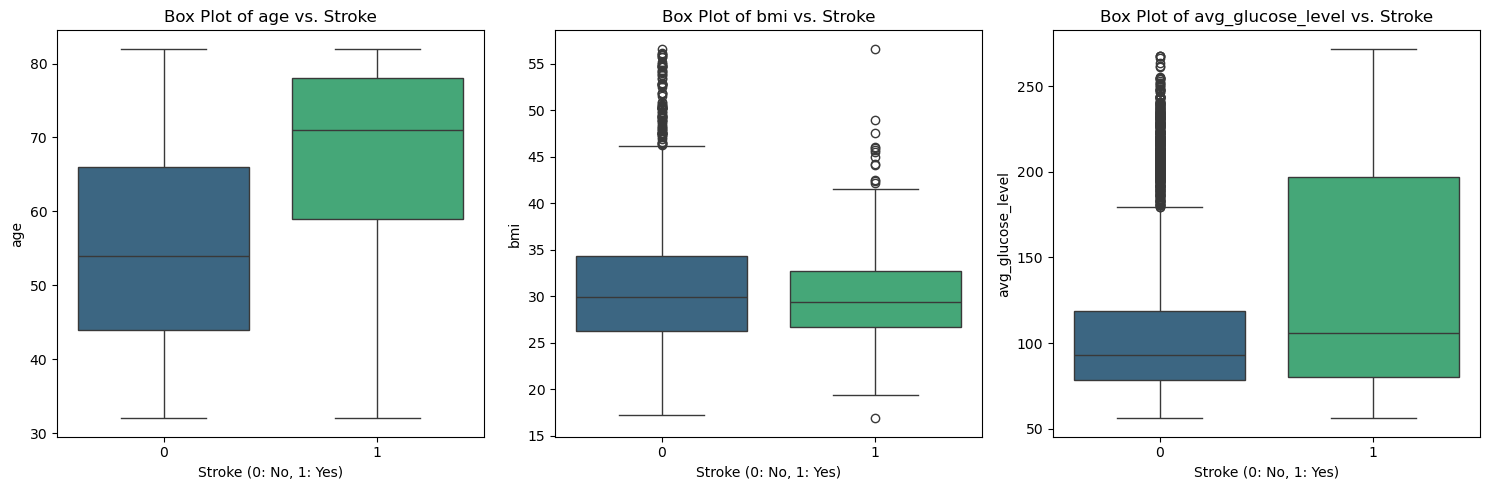

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


numerical_features = ['age', 'bmi', 'avg_glucose_level']

# Create subplots for each numerical feature
fig, axes = plt.subplots(1, len(numerical_features), figsize=(15, 5))  # 1 row, 3 columns

# Iterate through numerical features and create box plots
for i, feature in enumerate(numerical_features):
    # Create box plot using seaborn
    sns.boxplot(x='stroke', y=feature, data=df_stroke, ax=axes[i], palette='viridis')

    # Set plot title and labels
    axes[i].set_title(f'Box Plot of {feature} vs. Stroke')
    axes[i].set_xlabel('Stroke (0: No, 1: Yes)')
    axes[i].set_ylabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [109]:
!pip install imbalanced-learn

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters from GridSearchCV:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
      Metric    Score
0   Accuracy 0.928258
1  Precision 0.000000
2     Recall 0.000000
3   F1 Score 0.000000
4    ROC AUC 0.823795


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logisti

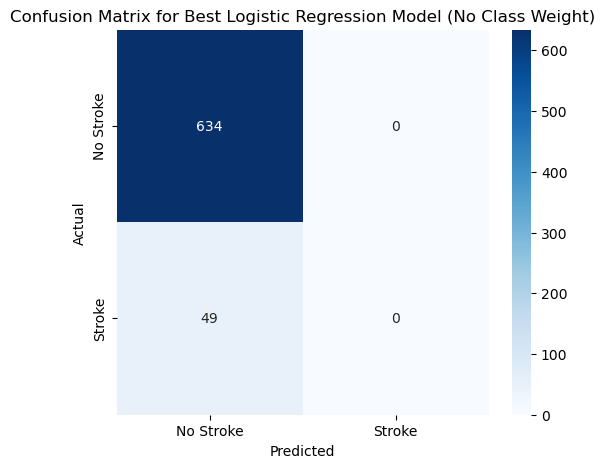

In [ ]:
#Logistic regression with Hyperparamater Tuning
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant columns for X (avg_glucose_level, heart_risk, and age)
X = df_stroke[['avg_glucose_level', 'heart_risk', 'age']]
y = df_stroke['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression without class_weight='balanced'
model = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms
    'penalty': ['l2', 'l1'],  # Regularization type
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Predict on test set using the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation Metrics for the best model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the metrics in a table
print(evaluation_metrics)

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix for Best Logistic Regression Model (No Class Weight)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters from GridSearchCV:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
      Metric    Score
0   Accuracy 0.695461
1  Precision 0.175510
2     Recall 0.877551
3   F1 Score 0.292517
4    ROC AUC 0.827593


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logisti

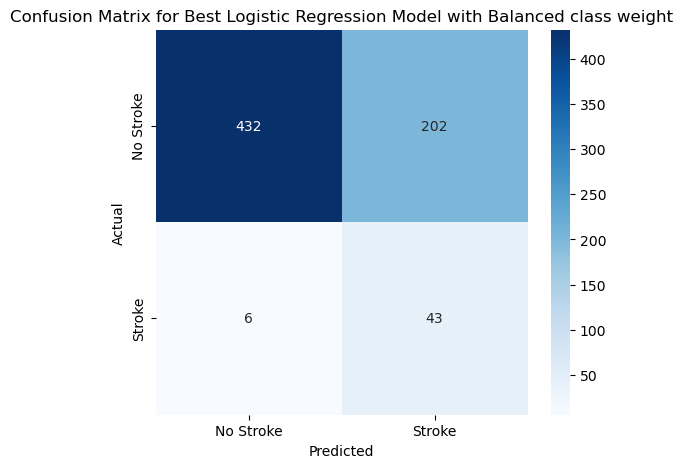

In [111]:
#Logistic Regression with Balanced Parameter and Hyperparameter tuning
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Select only the relevant columns for X (avg_glucose_level, heart_risk, and age)
X = df_stroke[['avg_glucose_level', 'heart_risk', 'age']]
y = df_stroke['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression with class_weight='balanced'
model = LogisticRegression(class_weight='balanced')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms
    'penalty': ['l2', 'l1'],  # Regularization type
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Predict on test set using the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation Metrics for the best model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the metrics in a table
print(evaluation_metrics)

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix for Best Logistic Regression Model with Balanced class weight")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters from GridSearchCV:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
      Metric    Score
0   Accuracy 0.673499
1  Precision 0.140496
2     Recall 0.693878
3   F1 Score 0.233677
4    ROC AUC 0.757967


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logisti

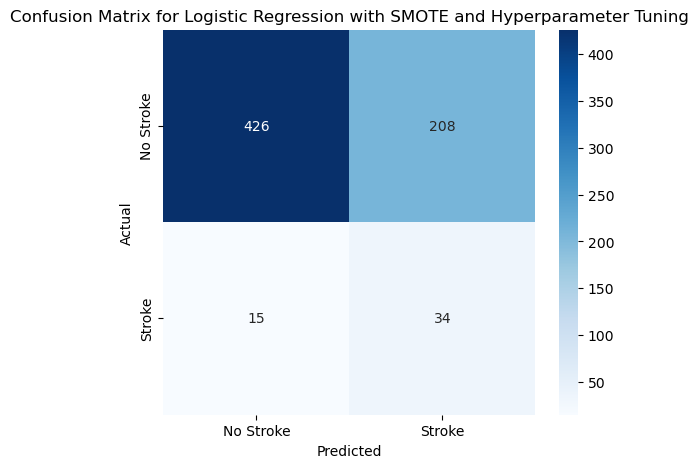

In [112]:
#Logistic Regression with Smote and Hyperparameter tuning
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming df_stroke is your dataset
# Ensure 'df_stroke' is already loaded

# Select only the relevant columns for X (avg_glucose_level, heart_risk, and age)
X = df_stroke[['avg_glucose_level', 'heart_risk', 'age']]
y = df_stroke['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for balancing the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression model
model = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms
    'penalty': ['l2', 'l1'],  # Regularization type
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Predict on test set using the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation Metrics for the best model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the metrics in a table
print(evaluation_metrics)

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix for Logistic Regression with SMOTE and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters from GridSearchCV:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
      Metric    Score
0   Accuracy 0.673499
1  Precision 0.140496
2     Recall 0.693878
3   F1 Score 0.233677
4    ROC AUC 0.757967


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logisti

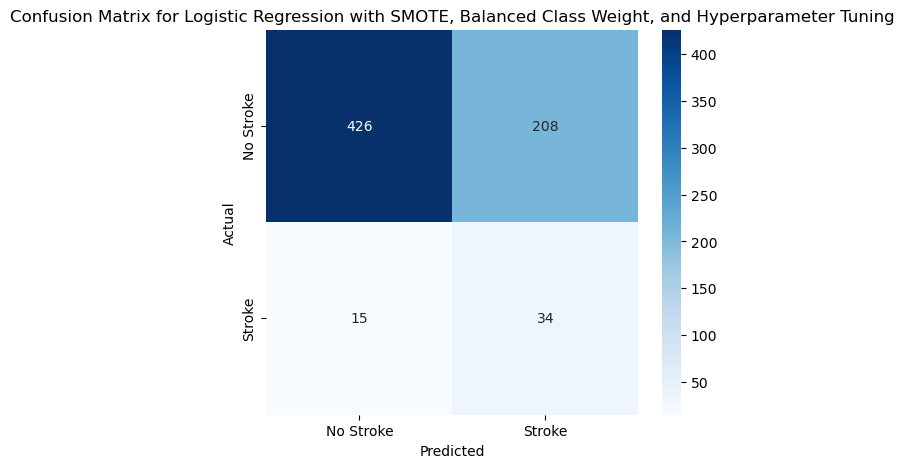

In [113]:
#Logistic Regression using Smote, Balanced parameter and hyperparameter tuning
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


# Select only the relevant columns for X (avg_glucose_level, heart_risk, and age)
X = df_stroke[['avg_glucose_level', 'heart_risk', 'age']]
y = df_stroke['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for balancing the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms
    'penalty': ['l2', 'l1'],  # Regularization type
    'max_iter': [100, 200, 300]  # Number of iterations
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Predict on test set using the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation Metrics for the best model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the metrics in a table
print(evaluation_metrics)

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix for Logistic Regression with SMOTE, Balanced Class Weight, and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters from GridSearchCV:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
      Metric    Score
0   Accuracy 0.928258
1  Precision 0.000000
2     Recall 0.000000
3   F1 Score 0.000000
4    ROC AUC 0.814508


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\xgboost\core.py:158: UserWarning: [10:25:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


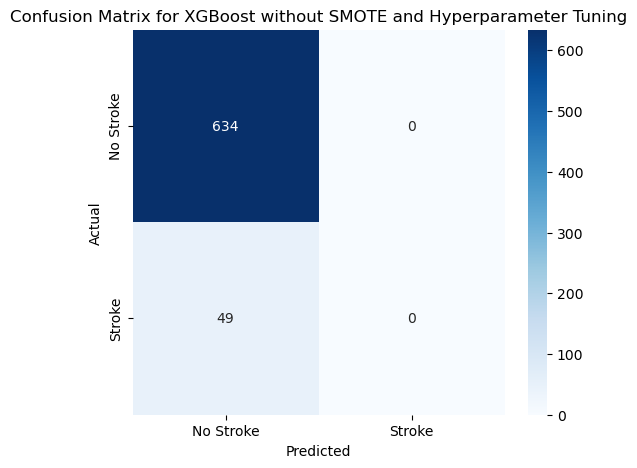

In [ ]:
#XGBoost with Hyperparameter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


# Select only the relevant columns for X (avg_glucose_level, heart_risk, and age)
X = df_stroke[['avg_glucose_level', 'heart_risk', 'age']]
y = df_stroke['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples to use for fitting each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features to use for each tree
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best XGBoost model on the test set
accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb)
recall = recall_score(y_test, y_pred_best_xgb)
f1 = f1_score(y_test, y_pred_best_xgb)
roc_auc = roc_auc_score(y_test, y_prob_best_xgb)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix for XGBoost with Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\xgboost\core.py:158: UserWarning: [10:26:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters from GridSearchCV:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
      Metric    Score
0   Accuracy 0.837482
1  Precision 0.102564
2     Recall 0.163265
3   F1 Score 0.125984
4    ROC AUC 0.622658


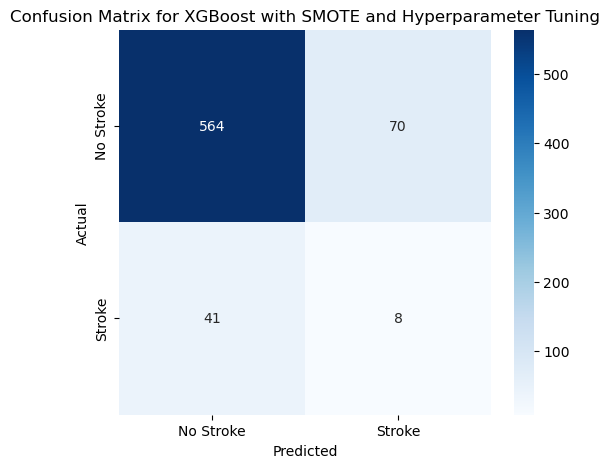

In [115]:
#XGBoost with Smote and Hyperparameter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import xgboost as xgb


# Select only the relevant columns for X (avg_glucose_level, heart_risk, and age)
X = df_stroke[['avg_glucose_level', 'heart_risk', 'age']]
y = df_stroke['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for balancing the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5],  # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples to use for fitting each tree
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features to use for each tree
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best XGBoost model on the test set
accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb)
recall = recall_score(y_test, y_pred_best_xgb)
f1 = f1_score(y_test, y_pred_best_xgb)
roc_auc = roc_auc_score(y_test, y_prob_best_xgb)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix for XGBoost with SMOTE and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [116]:
##Heart Disease


print (df_hd.isnull().sum())

gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
gender_encoded            0
ever_married_encoded      0
work_type_encoded         0
Residence_type_encoded    0
smoking_status_encoded    0
Age_temp                  0
avg_glucose_level_temp    0
dtype: int64


In [117]:
print (df_hd.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [118]:
# Convert categorical columns back to "category"
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = df_hd[col].astype('category')

print(df_hd.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [119]:
df['heart_risk'] = (df['hypertension'] | df['stroke']).astype(int)

# Verify the result
print(df[['hypertension', 'stroke', 'heart_risk']].head(10))

   hypertension  stroke  heart_risk
0             0       1           1
1             0       1           1
2             0       1           1
3             0       1           1
4             1       1           1
5             0       1           1
6             1       1           1
7             0       1           1
8             0       1           1
9             0       1           1


In [120]:
print (df_hd.dtypes)

gender                     object
age                       float64
hypertension                int64
heart_disease               int64
ever_married               object
work_type                  object
Residence_type             object
avg_glucose_level         float64
bmi                       float64
smoking_status             object
stroke                      int64
gender_encoded              int64
ever_married_encoded        int64
work_type_encoded           int64
Residence_type_encoded      int64
smoking_status_encoded      int64
Age_temp                    int64
avg_glucose_level_temp      int64
dtype: object


In [121]:
df_hd['heart_risk'] = (df_hd['hypertension'] | df_hd['stroke']).astype(int)

# Verify the result in your main DataFrame
print(df_hd[['hypertension', 'stroke', 'heart_risk']].head(10))

   hypertension  stroke  heart_risk
0             0       1           1
1             0       1           1
2             0       1           1
3             0       1           1
4             1       1           1
5             0       1           1
6             1       1           1
7             0       1           1
8             0       1           1
9             0       1           1


In [128]:
import pandas as pd
from scipy.stats import chi2_contingency


# Select your categorical features
categorical_features = [
    'gender_encoded',
    'hypertension',
    'stroke',
    'ever_married_encoded',
    'work_type_encoded',
    'Residence_type_encoded',
    'smoking_status_encoded',
    'heart_risk'
]

chi2_results_list = []

# Perform chi-square test for each categorical feature against 'stroke'
for feature in categorical_features:
    contingency_table = pd.crosstab(df_hd[feature], df_hd['heart_disease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results_list.append({'Feature': feature, 'Chi-square': chi2, 'P-value': p, 'Degrees of Freedom': dof})

# Convert results to a Pandas DataFrame
chi2_table = pd.DataFrame(chi2_results_list)

# Format the 'P-value' column to display as a float with a certain number of decimal places
pd.options.display.float_format = '{:.6f}'.format  # Display floats with 6 decimal places

# Sort the table by Chi-square statistic (optional)
chi2_table_sorted = chi2_table.sort_values(by='Chi-square', ascending=False)

# Display the table
print(chi2_table_sorted)

# To reset the float formatting to default (optional)
# pd.reset_option('display.float_format')


                  Feature  Chi-square  P-value  Degrees of Freedom
7              heart_risk   59.518010 0.000000                   1
2                  stroke   48.486441 0.000000                   1
0          gender_encoded   41.668182 0.000000                   1
1            hypertension   25.182245 0.000001                   1
4       work_type_encoded   12.548810 0.001884                   2
6  smoking_status_encoded   12.276205 0.006494                   3
3    ever_married_encoded    0.289938 0.590260                   1
5  Residence_type_encoded    0.000000 1.000000                   1


In [129]:
import pandas as pd
from scipy.stats import mannwhitneyu


numerical_features = ['age', 'bmi', 'avg_glucose_level']  # List of numerical features

results = {}  # Dictionary to store results

for feature in numerical_features:
    # Separate data for stroke and no-stroke groups
    hd_data = df_hd[df_hd['heart_disease'] == 1][feature]
    no_hd_data = df_hd[df_hd['heart_disease'] == 0][feature]

    # Perform the Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(hd_data, no_hd_data, alternative='two-sided')

    results[feature] = {'U Statistic': u_statistic, 'P-value': p_value}

# Print the results
for feature, values in results.items():
    print(f"Feature: {feature}")
    print(f"  Mann-Whitney U Statistic: {values['U Statistic']:.3f}")
    print(f"  P-value: {values['P-value']:.3f}")
    print("-" * 20)  # Separator for clarity

Feature: age
  Mann-Whitney U Statistic: 718012.000
  P-value: 0.000
--------------------
Feature: bmi
  Mann-Whitney U Statistic: 451984.000
  P-value: 0.729
--------------------
Feature: avg_glucose_level
  Mann-Whitney U Statistic: 566664.500
  P-value: 0.000
--------------------


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters from GridSearchCV:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
      Metric    Score
0   Accuracy 0.922330
1  Precision 0.000000
2     Recall 0.000000
3   F1 Score 0.000000
4    ROC AUC 0.842015


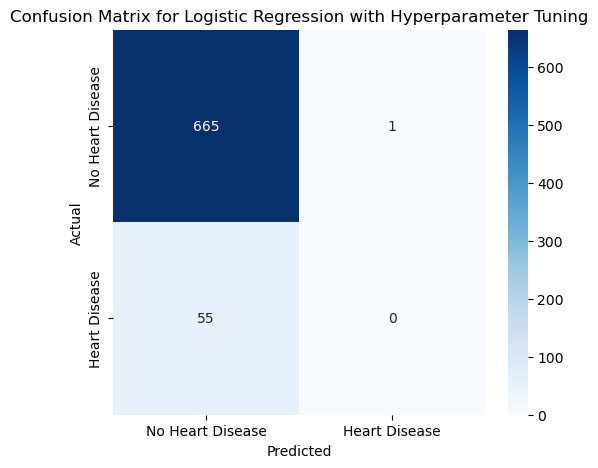

In [ ]:
#Logistic Regression with Hyperparamter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant predictors and target variable
X = df_hd[['age', 'avg_glucose_level', 'heart_risk', 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded', 'stroke']]
y = df_hd['heart_disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200],  # Maximum number of iterations
    'solver': ['liblinear'],  # Solver for optimization
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_lr_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_lr = best_lr_model.predict(X_test)
y_prob_best_lr = best_lr_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best Logistic Regression model on the test set
accuracy = accuracy_score(y_test, y_pred_best_lr)
precision = precision_score(y_test, y_pred_best_lr)
recall = recall_score(y_test, y_pred_best_lr)
f1 = f1_score(y_test, y_pred_best_lr)
roc_auc = roc_auc_score(y_test, y_prob_best_lr)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_best_lr)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Logistic Regression with Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters from GridSearchCV:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
      Metric    Score
0   Accuracy 0.725381
1  Precision 0.190476
2     Recall 0.800000
3   F1 Score 0.307692
4    ROC AUC 0.840786


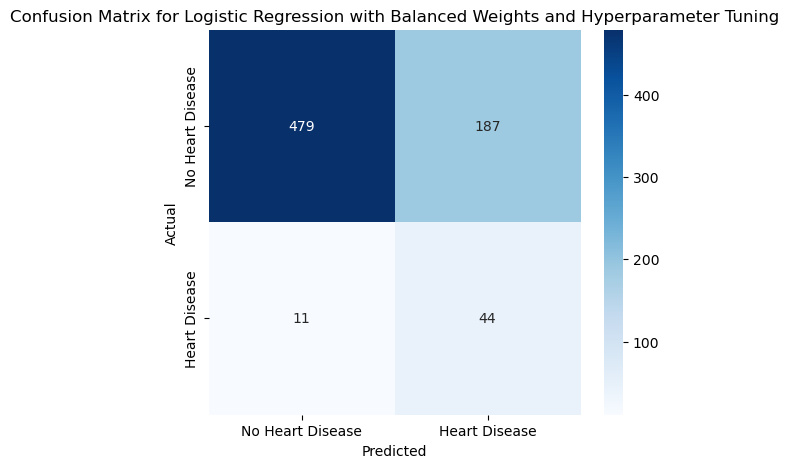

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant predictors and target variable
X = df_hd[['age', 'avg_glucose_level', 'heart_risk', 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded', 'stroke']]
y = df_hd['heart_disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Logistic Regression model with balanced class weight
lr_model_balanced = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200],  # Maximum number of iterations
    'solver': ['liblinear'],  # Solver for optimization
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr_model_balanced, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_lr_model_balanced = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_lr_balanced = best_lr_model_balanced.predict(X_test)
y_prob_best_lr_balanced = best_lr_model_balanced.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best Logistic Regression model on the test set
accuracy = accuracy_score(y_test, y_pred_best_lr_balanced)
precision = precision_score(y_test, y_pred_best_lr_balanced)
recall = recall_score(y_test, y_pred_best_lr_balanced)
f1 = f1_score(y_test, y_pred_best_lr_balanced)
roc_auc = roc_auc_score(y_test, y_prob_best_lr_balanced)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for Logistic Regression with Balanced Weights
cm_lr_balanced = confusion_matrix(y_test, y_pred_best_lr_balanced)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_balanced, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Logistic Regression with Balanced Weights and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters from GridSearchCV:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
      Metric    Score
0   Accuracy 0.737864
1  Precision 0.165000
2     Recall 0.600000
3   F1 Score 0.258824
4    ROC AUC 0.753754


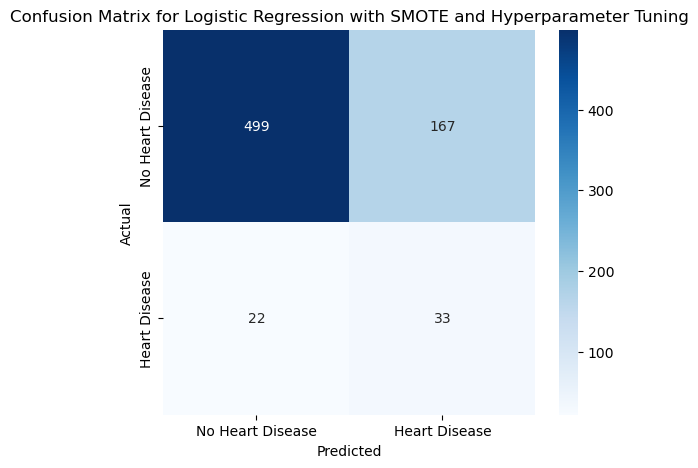

In [ ]:
#Logistic Regression with Smote and Hyperparameter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant predictors and target variable 
X = df_hd[['age', 'avg_glucose_level', 'heart_risk', 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded', 'stroke']]
y = df_hd['heart_disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200],  # Maximum number of iterations
    'solver': ['liblinear'],  # Solver for optimization
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_lr_model_smote = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_lr_smote = best_lr_model_smote.predict(X_test)
y_prob_best_lr_smote = best_lr_model_smote.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best Logistic Regression model on the test set
accuracy = accuracy_score(y_test, y_pred_best_lr_smote)
precision = precision_score(y_test, y_pred_best_lr_smote)
recall = recall_score(y_test, y_pred_best_lr_smote)
f1 = f1_score(y_test, y_pred_best_lr_smote)
roc_auc = roc_auc_score(y_test, y_prob_best_lr_smote)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for Logistic Regression with SMOTE
cm_lr_smote = confusion_matrix(y_test, y_pred_best_lr_smote)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_smote, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Logistic Regression with SMOTE and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters from GridSearchCV:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
      Metric    Score
0   Accuracy 0.737864
1  Precision 0.165000
2     Recall 0.600000
3   F1 Score 0.258824
4    ROC AUC 0.753754


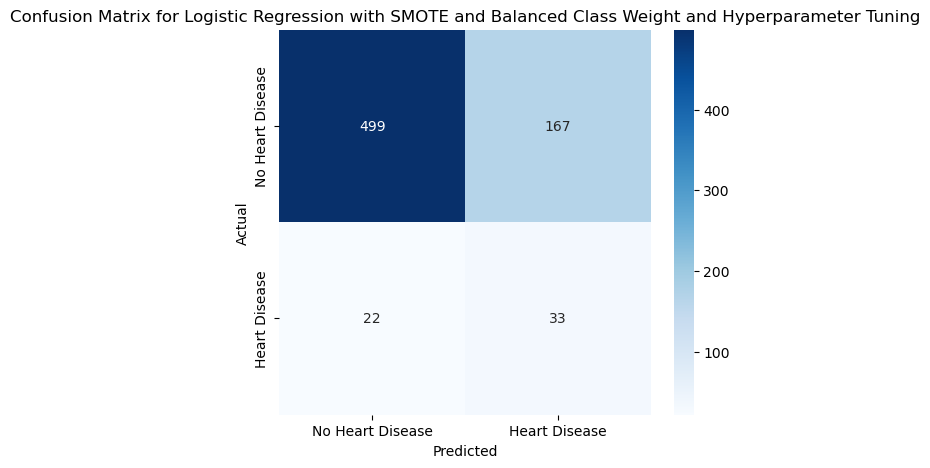

In [ ]:
#Logistic Regression with Smote, Balanced weights and Hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant predictors and target variable 
X = df_hd[['age', 'avg_glucose_level', 'heart_risk', 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded', 'stroke']]
y = df_hd['heart_disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the Logistic Regression model with balanced class weight
lr_model_balanced = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200],  # Maximum number of iterations
    'solver': ['liblinear'],  # Solver for optimization
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr_model_balanced, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_lr_model_balanced_smote = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_lr_balanced_smote = best_lr_model_balanced_smote.predict(X_test)
y_prob_best_lr_balanced_smote = best_lr_model_balanced_smote.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best Logistic Regression model on the test set
accuracy = accuracy_score(y_test, y_pred_best_lr_balanced_smote)
precision = precision_score(y_test, y_pred_best_lr_balanced_smote)
recall = recall_score(y_test, y_pred_best_lr_balanced_smote)
f1 = f1_score(y_test, y_pred_best_lr_balanced_smote)
roc_auc = roc_auc_score(y_test, y_prob_best_lr_balanced_smote)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for Logistic Regression with SMOTE and Balanced Class Weight
cm_lr_balanced_smote = confusion_matrix(y_test, y_pred_best_lr_balanced_smote)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_balanced_smote, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for Logistic Regression with SMOTE and Balanced Class Weight and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters from GridSearchCV:  {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
      Metric    Score
0   Accuracy 0.923717
1  Precision 0.000000
2     Recall 0.000000
3   F1 Score 0.000000
4    ROC AUC 0.812790


c:\Users\poula\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


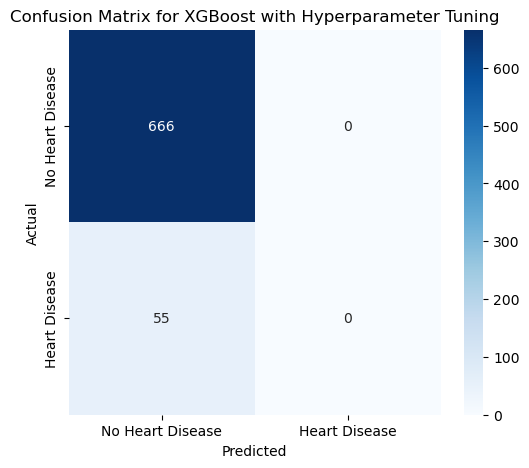

In [ ]:
#Xgboost with hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant predictors and target variable 
X = df_hd[['age', 'avg_glucose_level', 'heart_risk', 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded', 'stroke']]
y = df_hd['heart_disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight for a child
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best XGBoost model on the test set
accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb)
recall = recall_score(y_test, y_pred_best_xgb)
f1 = f1_score(y_test, y_pred_best_xgb)
roc_auc = roc_auc_score(y_test, y_prob_best_xgb)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for XGBoost with Hyperparameter Tuning
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for XGBoost with Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters from GridSearchCV:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
      Metric    Score
0   Accuracy 0.858530
1  Precision 0.138462
2     Recall 0.163636
3   F1 Score 0.150000
4    ROC AUC 0.712067


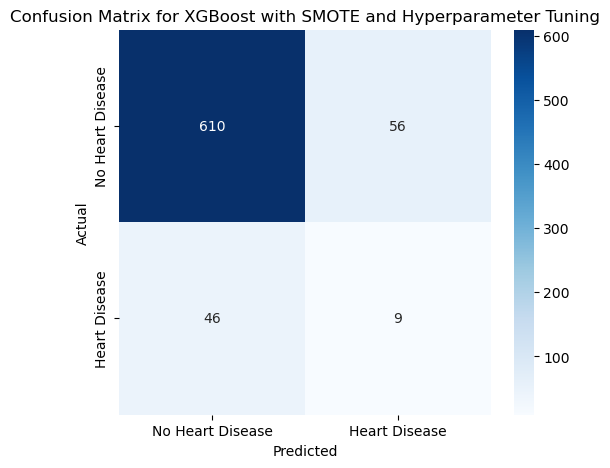

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_hd is your dataset
# Select relevant predictors and target variable 
X = df_hd[['age', 'avg_glucose_level', 'heart_risk', 'gender_encoded', 'work_type_encoded', 'smoking_status_encoded', 'stroke']]
y = df_hd['heart_disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight for a child
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV: ", best_params)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the best XGBoost model on the test set
accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb)
recall = recall_score(y_test, y_pred_best_xgb)
f1 = f1_score(y_test, y_pred_best_xgb)
roc_auc = roc_auc_score(y_test, y_prob_best_xgb)

# Create a DataFrame for the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display the evaluation metrics in a table
print(evaluation_metrics)

# Confusion Matrix for XGBoost with SMOTE and Hyperparameter Tuning
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# -------- Plot Confusion Matrix --------
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix for XGBoost with SMOTE and Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
